In [190]:
#Lab 3 Inteligencia Artificial - grupo 4
import pandas as pd                                         # data manipulation
import numpy as np                                          # array manipulation
import matplotlib.pyplot as plt                             # visualization tool
import seaborn as sns                                       # visualization tool
from sklearn.model_selection import train_test_split        # for divide our dataset in train and test datasets
from sklearn.preprocessing import OneHotEncoder             # one hot encode column transformer
from imblearn.under_sampling import RandomUnderSampler      # undersample data
from imblearn.over_sampling import SMOTE, RandomOverSampler # oversmple data
from sklearn.pipeline import make_pipeline                  # pipeline for efficient algorithm packing
from sklearn.preprocessing import StandardScaler            # scale the dataset
from sklearn.linear_model import SGDClassifier, RidgeClassifier # linear models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # boosting algorithms
from xgboost import XGBClassifier                           # xgboost algorithm
from sklearn.model_selection import GridSearchCV            # hyperparameter search
from sklearn.metrics import accuracy_score, recall_score    # import scikit-learn metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import f1_score
import joblib                                               # for model serialization
import json                                                 # manipulation of json files
import os                                                   # use operating systems functions
%matplotlib inline

In [ ]:
!pip install pandas-profiling==3.0.0

In [ ]:
!pip install pydantic-settings

In [ ]:
from pydantic_settings import BaseSettings

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport                  # dataset profiling reporting tool

In [ ]:
# instalamos esta dependencia que es necesaria en un punto
!pip install pillow
!pip install opencv-python

In [ ]:
!wget --help /content/drive/MyDrive/plantas/archive.zip

In [ ]:
# funcion utilitaria para extraer data
def unzip_data(path):
    with ZipFile(path, 'r') as zipObj:
        zipObj.extractall()

In [ ]:
!ls -l /content/drive/MyDrive/plantas/archive.zip

-rw------- 1 root root 10663 Mar  5 00:08 /content/drive/MyDrive/plantas/archive.zip


In [ ]:
def unzip_data(archive_zip):
    with ZipFile(archivo_zip, 'r') as zipObj:
        zipObj.extractall()
        # Fix: Call pandas.read_csv instead of read_csv
        pd.read_csv(archive_zip)

In [ ]:
def unzip_data(archive_zip):
    with zipfile.ZipFile(archivo_zip, 'r') as zipObj:
        # Extract only the 'train.csv' file
        zipObj.extract('train.csv')

In [ ]:
import os
from urllib.request import urlretrieve
import tempfile

# para tener repitividad en los resultados generados
np.random.seed(42)

# Creamos un directorio temporal
d = tempfile.mkdtemp()


# Definimos el URL
url = 'https://www.kaggle.com/datasets/csafrit2/plant-leaves-for-image-classification'



In [127]:
filename = "Plants_2"
destination_path = os.path.join(os.getcwd(), filename)

In [ ]:
from urllib.parse import urlparse

result = urlparse(url)
print(result)

ParseResult(scheme='https', netloc='www.kaggle.com', path='/datasets/csafrit2/plant-leaves-for-image-classification', params='', query='', fragment='')


In [ ]:
import urllib.parse

url = urllib.parse.urljoin('https://drive.google.com/file/d/1JUKrWdX-jDICb9qf2POdJK283n3fBt1_/view?usp=drive_link', url)
print(url)

https://www.kaggle.com/datasets/csafrit2/plant-leaves-for-image-classification


In [124]:
import os
target_dir = os.path.join(d, '/content/drive/MyDrive/plantas/Plants_2')
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

In [ ]:
!ls {target_dir}

/content/drive/MyDrive/plantas/archive.zip


In [126]:
# Tenemos la data
fn, info = urlretrieve(url, os.path.join(target_dir, '/content/drive/MyDrive/plantas/archive.zip'))

In [ ]:
!pip install google-api-python-client

In [ ]:
from googleapiclient.discovery import build

In [ ]:
drive_service = build('drive', 'v3')

In [ ]:
!pip install google-auth

In [ ]:
!pip install --upgrade google-api-python-client

In [ ]:
import googleapiclient.discovery

In [ ]:
# Authenticate with Google Drive using appropriate credentials.
# Replace 'credentials.json' with the path to your credentials file.
drive_service = googleapiclient.discovery.build('drive', 'v3')

In [ ]:
from google.auth.compute_engine import Credentials

In [ ]:
drive_service = googleapiclient.discovery.build(
    'drive', 'v3', credentials=Credentials(), cache_discovery=False
)

In [93]:
print("[INFO] Creada carpeta temporal en:", fn)
print("[INFO] Mi directorio actual de trabajo es:", os.getcwd())

[INFO] Creada carpeta temporal en: /content/drive/MyDrive/plantas/archive.zip
[INFO] Mi directorio actual de trabajo es: /content


In [128]:
myimagedir = os.path.join(os.getcwd(), '/content/drive/MyDrive/plantas/Plants_2')
if not os.path.exists(myimagedir):
    os.mkdir(myimagedir)


In [129]:
!unzip -t {fn}

Archive:  /content/drive/MyDrive/plantas/archive.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/drive/MyDrive/plantas/archive.zip or
        /content/drive/MyDrive/plantas/archive.zip.zip, and cannot find /content/drive/MyDrive/plantas/archive.zip.ZIP, period.


In [130]:
!ls /content/drive/MyDrive/plantas/archive.zip

/content/drive/MyDrive/plantas/archive.zip


In [ ]:
!stat /content/drive/MyDrive/plantas/archive.zip

  File: /content/drive/MyDrive/plantas/archive.zip
  Size: 10608     	Blocks: 21         IO Block: 65536  regular file
Device: 30h/48d	Inode: 29          Links: 1
Access: (0600/-rw-------)  Uid: (    0/    root)   Gid: (    0/    root)
Access: 2024-03-09 02:42:07.000000000 +0000
Modify: 2024-03-09 02:42:02.000000000 +0000
Change: 2024-03-09 02:45:43.000000000 +0000
 Birth: -


In [131]:
!file {fn}

/content/drive/MyDrive/plantas/archive.zip: HTML document, ASCII text, with very long lines (2878), with CRLF line terminators


In [ ]:
!ls -l {fn}


-rw------- 1 root root 10608 Mar  9 02:42 /content/drive/MyDrive/plantas/archive.zip


In [94]:
def unzip_data(archive_zip):
    with zipfile.ZipFile(archive_zip, 'r') as zipObj:
        # Extract all files in the zip archive
        zipObj.extractall()

In [95]:
def unzip_data(archive_zip):
    with zipfile.ZipFile(archive_zip, 'r') as zipObj:
        # Extract only the 'train.csv' file
        zipObj.extract('train.csv')

In [132]:
# Print the type of the filename variable
print(type(filename))

# Print the value of the filename variable
print(filename)

<class 'str'>
Plants_2


In [ ]:
!pip install patool

In [ ]:
!pip show patool

In [71]:
!ls '/content/drive/MyDrive/plantas/archive.zip'

/content/drive/MyDrive/plantas/archive.zip


In [133]:
jpeglist = os.listdir('/content/drive/MyDrive/plantas/Plants_2')

In [145]:
with open('filename', 'w') as lbl:
    for i in range(len(jpeglist)):
        if i <= 45:
            leafclass = 10
        elif i <= 125:
            leafclass = 1
        else:
            leafclass = 2
        lbl.write(str(leafclass) + '\n')
lbl.close()

In [72]:
!file '/content/drive/MyDrive/plantas/archive.zip'

/content/drive/MyDrive/plantas/archive.zip: HTML document, ASCII text, with very long lines (2878), with CRLF line terminators


In [146]:
# Leer el archivo de labels en un arreglo de numpy
import numpy as np
target = np.genfromtxt('filename').astype(np.uint8)
target.shape

(2,)

In [147]:
import glob

image_files = glob.glob(os.path.join(myimagedir, "*.jpg"))

for index, filename in enumerate(image_files):
    img = PIL.Image.open(filename)
    pixels = np.array(img).reshape(w*h*nchan)
    imgarr[:, index] = pixels

In [148]:
import os
import PIL
from PIL import Image

w       = 6000
h       = 4000
nimages = 2
nchan   = 3
myimagedir = os.getcwd()
imgarr   = np.zeros((w*h*nchan, nimages), dtype=np.uint8)


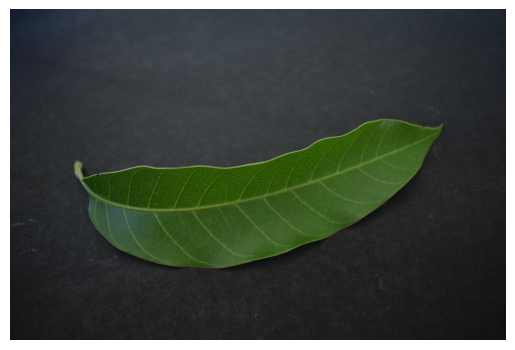

In [183]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy.random import randint

# Ahora imprimiremos una hoja aleatorea
some_leaf = imgarr[:, randint(0, 2)].reshape(6000, 4000, 3)
plt.axis("off")
plt.imshow(R)
plt.show()

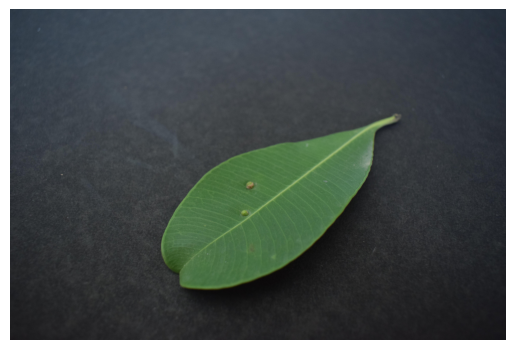

In [188]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy.random import randint

# Ahora imprimiremos una hoja aleatorea
some_leaf = imgarr[:, randint(0, 2)].reshape(6000, 4000, 3)
plt.axis("off")
plt.imshow(A)
plt.show()


In [172]:
import os
import numpy as np
from PIL import Image

In [164]:
if filename.endswith(".jpg") or filename.endswith(".png"):
    img = Image.open(os.path.join(myimagedir, filename))

In [176]:
'''
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy.random import randint

# Ahora imprimiremos una hoja aleatorea
some_leaf = imgarr[:, randint(0, 2), :].reshape(6000, 4000, 3)
plt.imshow(some_leaf)
plt.axis("off")

plt.show()
'''

'\n%matplotlib inline\nimport matplotlib\nimport matplotlib.pyplot as plt\nfrom numpy.random import randint\n\n# Ahora imprimiremos una hoja aleatorea\nsome_leaf = imgarr[:, randint(0, 2), :].reshape(6000, 4000, 3)\nplt.imshow(some_leaf)\nplt.axis("off")\n\nplt.show()\n'

In [177]:
# Como todas las clases tienen 59 datos, vamos a emparejarlas solamente para poder dividir mejor el dataset
X = imgarr
Y = target
Y = np.hstack((Y[:60], Y[66:]))
X = np.hstack((X[:, :60], X[:, 66:]))
X.shape, Y.shape

((72000000, 2), (2,))

In [178]:
# Dividimos ahora el training set y el test set
nimginclass = 60
train = int(0.8*60)
test = 60 - train

# La primera clase va de 0 a 59, la segunda de 60 a 119 y la ultima de 120 a 179
# Sin embargo son de 0 a 47 imagenes de training y de 48 a 59 para test para cada clase
Xtrain = np.hstack((X[:,   :48], X[:, 60:(60+48)], X[:, 120:(120+48)]))/255
Xtest  = np.hstack((X[:, 48:(48+12)], X[:, (60+48):(60+48+12)], X[:, (120+48):]))/255
Ytrain = np.hstack((Y[:48], Y[60:(60+48)], Y[120:(120+48)]))
Ytest  = np.hstack((Y[48:(48+12)], Y[(60+48):(60+48+12)], Y[(120+48):]))

In [189]:
print("Existen {} imagenes de training en una clase y {} imagenes de prueba en cada clase para un total de {} imagenes por clase".format(train, test, nimginclass))

Existen 48 imagenes de training en una clase y 12 imagenes de prueba en cada clase para un total de 60 imagenes por clase


Clasificacion Multiclase